In [3]:
import random
import time
import math
import numpy as np
from matplotlib.pyplot import * 

In [4]:
# System parameters
n = 10               # Number of bits 
signal_freq = 1     # First null of sinc freq
#Tb = 1/signal_freq
sampling_freq = 10      

In [5]:
data = np.random.randint(0, 2, n, dtype=np.uint8)
def generate_pulse(snr):
    N0 = 10 ** (-snr/10)
    #print(data)
    waveform = []

    # Pulse shape modulator
    for e in data:
        value = e * 2 - 1
        for i in range(sampling_freq):
            waveform.append(value)
    #print(waveform)

    # Channel effect
    for i in range(len(waveform)):
        waveform[i] += random.gauss(0 ,math.sqrt( N0/2 ))
    return waveform

In [12]:
h1 = [1] * sampling_freq
def matched_filter(waveform , plt ):
    y = np.convolve(waveform , h1) / sampling_freq
    if(plt):
        graph(y , "Matched filter")

    return calc_ber(y)

In [23]:
h2 = [1]  #delta
def second_filter(waveform,plt):
    y = np.convolve(waveform , h2)
    if(plt):
        graph(y , "Second filter")
    
    return calc_ber(y)

In [24]:
h3 = [ math.sqrt(3)*x for x in np.linspace(0, 1/signal_freq + 1 , (sampling_freq) )]
def third_filter(waveform,plt):
    y = np.convolve(waveform , h3) / sampling_freq
    if(plt):
        graph(y , "Third filter")
     
    return calc_ber(y)

In [25]:
def graph(y , heading):
    markers_on = [i for i in range(sampling_freq - 1, n * sampling_freq, sampling_freq)]
    plot([ x/sampling_freq + 1/sampling_freq for x in range(0,len(y),1)] , y, '-o', markerfacecolor='red', markevery=markers_on)
    xlabel("Time")
    ylabel("Amplitude")
    title(heading)
    figure()

In [26]:
def calc_ber(y):
    # samples at Tb
    y = np.array([ y[i] for i in range(sampling_freq - 1, n*sampling_freq, sampling_freq)])
    # Decision
    y[y <= 0] = 0
    y[y > 0] = 1
    # Calc ber
    return  np.abs(y - data).sum() / len(data)

[0 0 0 0 0 1 0 1 1 1]


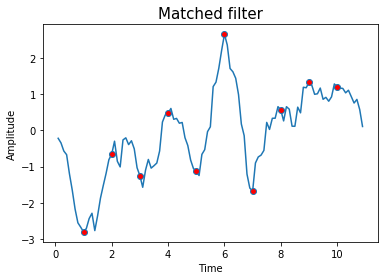

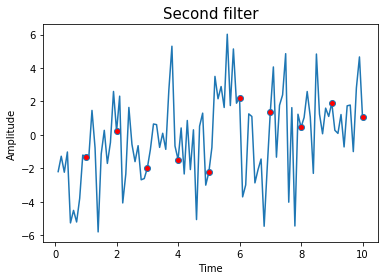

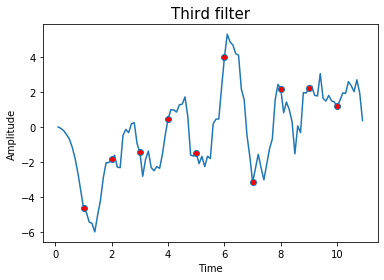

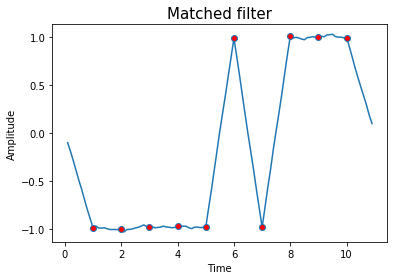

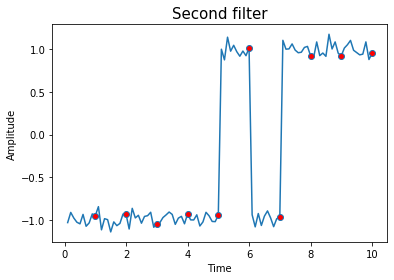

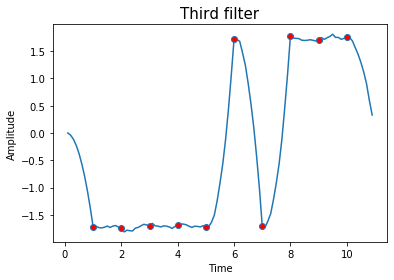

<Figure size 432x288 with 0 Axes>

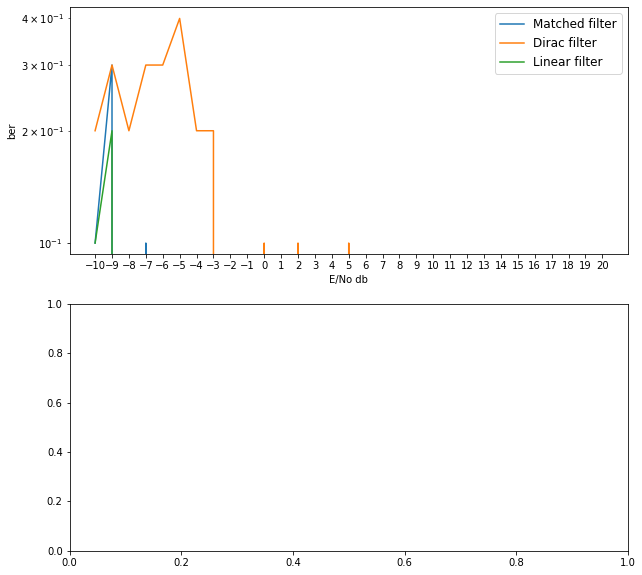

In [27]:
ber1 =[]
ber2 = []
ber3 = []
bers = [ber1,ber2,ber3]
labels = ["Matched filter" , "Dirac filter" , "Linear filter"]
print(data)
for i in range(-10,21):
    waveform = generate_pulse(i)
    flag = False
    if( i == -10 or i == 20):
        flag = True
    a = matched_filter(waveform, flag )
    b = second_filter(waveform, flag )
    c = third_filter(waveform, flag )
    ber1.append(a)
    ber2.append(b)
    ber3.append(c)
    
fig, axs = subplots(2 ,figsize=(10,10))


x = [i for i in range(-10,21)]

rc('axes', titlesize=15)    # fontsize of the tick labels
rc('legend', fontsize=12)    # legend fontsize

for i in range(3):
    line, = axs[0].plot(x , bers[i])
    line.set_label(labels[i])
axs[0].set_yscale('log')
axs[0].set_xticks(x, )
axs[0].set_xlabel('E/No db')
axs[0].set_ylabel('ber')
axs[0].legend()

